## Potato Image Classifcation
* By Jackie Nguyen
* github:https://github.com/aznone5
* linkedin:https://www.linkedin.com/in/jackie-dan-nguyen/

## Objective
* 1. Change the Photo libary and seperate them into train, test, validation folders using "SplitFolders"
* 2. Using Tensorflow, edit images inside the folders into Tensors, + approriate sizing.
* 3. Display Tensor images and predict what stage the Potato leaf is in "Healthy, Early_blight, Late_blight" 
* 4. Create a Sequential Model with relu activation

## Import

In [139]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
batch_size = 32
img_size = 256
channels=3
epochs=50

In [20]:
data = tf.keras.preprocessing.image_dataset_from_directory(
                                        'C:/Users/Jacki/anaconda mini/Potato images/Potato', 
                                        shuffle = True,
                                        image_size = (img_size,img_size),
                                        batch_size = batch_size,
)

Found 2152 files belonging to 3 classes.


In [21]:
class_name = data.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [22]:
len(data)

68

## Showcasing  Images

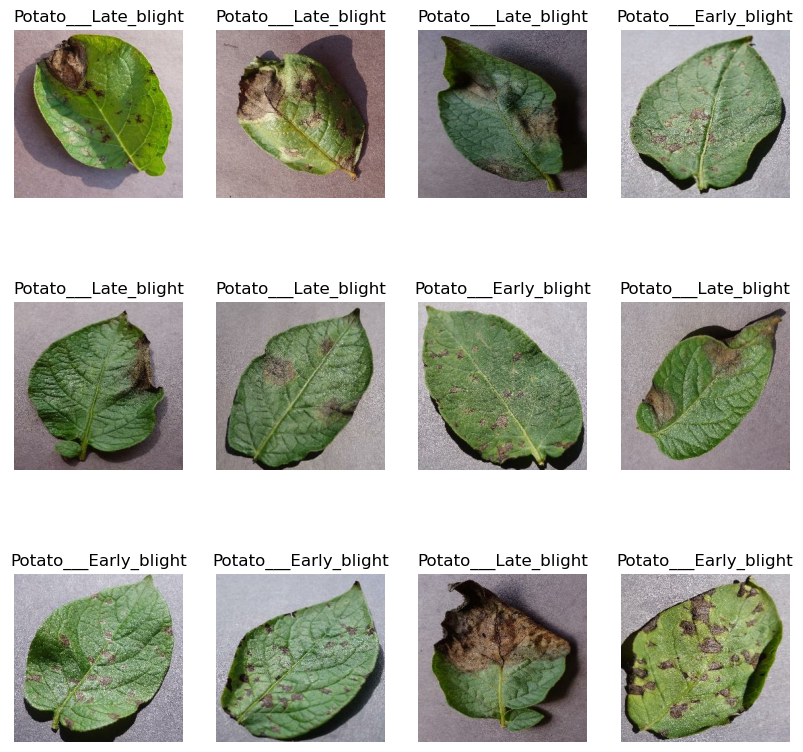

In [23]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in data.take(1):
    
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

## Shuffling

In [24]:
def get_dataset(df, train_split = 0.8, test_split = 0.1, val_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    df_size = len(df)
    
    if shuffle:
        df = df.shuffle(shuffle_size, seed = 42)
    
    train_size = int(train_split * df_size)
    train = df.take(train_size)
    
    val_size = int(val_split * df_size)
    val = df.skip(train_size).take(val_size)
    
    test_size = int(test_split * df_size)
    test = df.skip(train_size).skip(val_size)
    
    return train, test, val

In [25]:
train, test, val = get_dataset(data)
len(train), len(test), len(val)

(54, 8, 6)

In [26]:
train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val = val.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

## Model Image Fitting

In [27]:
resize_rescale = tf.keras.Sequential([layers.experimental.preprocessing.Resizing(img_size, img_size),
                     layers.experimental.preprocessing.Rescaling(1.0/255)
                    ])

In [28]:
data_aug = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                     layers.experimental.preprocessing.RandomRotation(0.2)
                    ])

In [29]:
input_shape = (batch_size, img_size, img_size, channels)
model = models.Sequential([
                        resize_rescale,
                        data_aug, 
                        layers.Conv2D(32, (3,3), activation = "relu", input_shape = (batch_size, 256, 256, channels)),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, kernel_size =(3,3), activation = "relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, kernel_size =(3,3), activation = "relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, (3,3), activation = "relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, (3,3), activation = "relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, (3,3), activation = "relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(64, activation = 'relu'),
                        layers.Dense(3, activation = "softmax")

                          
])

model.build(input_shape = input_shape)

In [30]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_5 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [31]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
             metrics = ['accuracy'])

In [32]:
history = model.fit(
train,
epochs = epochs,
batch_size = batch_size,
verbose = 1,
validation_data =val)

Epoch 1/50
54/54 [==============================] - 50s 841ms/step - loss: 0.8905 - accuracy: 0.5141 - val_loss: 0.8479 - val_accuracy: 0.6979
Epoch 2/50
54/54 [==============================] - 42s 784ms/step - loss: 0.5635 - accuracy: 0.7512 - val_loss: 0.3858 - val_accuracy: 0.7969
Epoch 3/50
54/54 [==============================] - 44s 813ms/step - loss: 0.3764 - accuracy: 0.8398 - val_loss: 0.3049 - val_accuracy: 0.8594
Epoch 4/50
54/54 [==============================] - 42s 785ms/step - loss: 0.3279 - accuracy: 0.8656 - val_loss: 0.2831 - val_accuracy: 0.8854
Epoch 5/50
54/54 [==============================] - 42s 782ms/step - loss: 0.2506 - accuracy: 0.8903 - val_loss: 0.2029 - val_accuracy: 0.9375
Epoch 6/50
54/54 [==============================] - 43s 803ms/step - loss: 0.1964 - accuracy: 0.9214 - val_loss: 0.1891 - val_accuracy: 0.9271
Epoch 7/50
54/54 [==============================] - 49s 913ms/step - loss: 0.2079 - accuracy: 0.9161 - val_loss: 0.4014 - val_accuracy: 0.8490

## Scoring and Graphs

In [33]:
scores = model.evaluate(test)
scores

8/8 [==============================] - 5s 448ms/step - loss: 0.0620 - accuracy: 0.9727


[0.0619676448404789, 0.97265625]

In [35]:
potato = history.history
potato.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
acc = potato['accuracy']
val_acc = potato['val_accuracy']

loss = potato['loss']
val_loss = potato['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

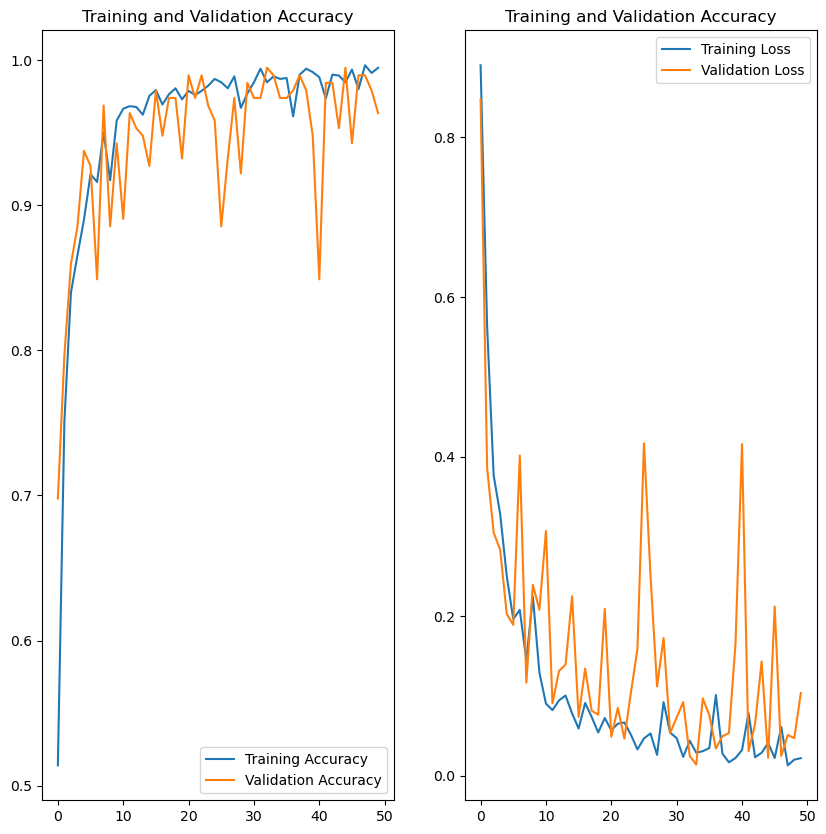

In [38]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = 'Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label = 'Training Loss')
plt.plot(range(epochs), val_loss, label = 'Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")


## Image Prediction Display

Actual Label: Potato___Late_blight
1/1 [==============================] - 1s 586ms/step
1


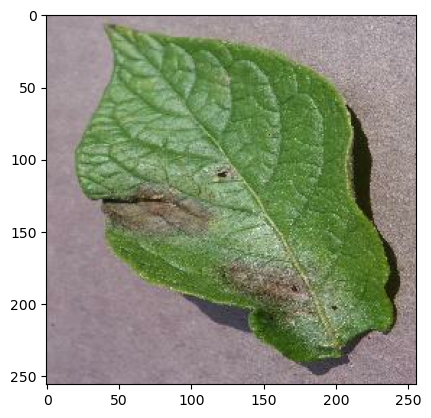

In [46]:
for image, label in test.take(1):
    image_1 = image[0].numpy().astype('uint8')
    label_1 = label[0].numpy()
    
    plt.imshow(image_1)
    print("Actual Label:", class_name[label_1])
    
    pred = model.predict(image)
    print(np.argmax(pred[0]))

In [62]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    pred = model.predict(img_array)
    
    pred_class = class_name[np.argmax(pred[0])]
    
    confidence = round(100 * (np.max(pred[0])))
    
    return pred_class, confidence

1/1 [==============================] - 0s 86ms/step


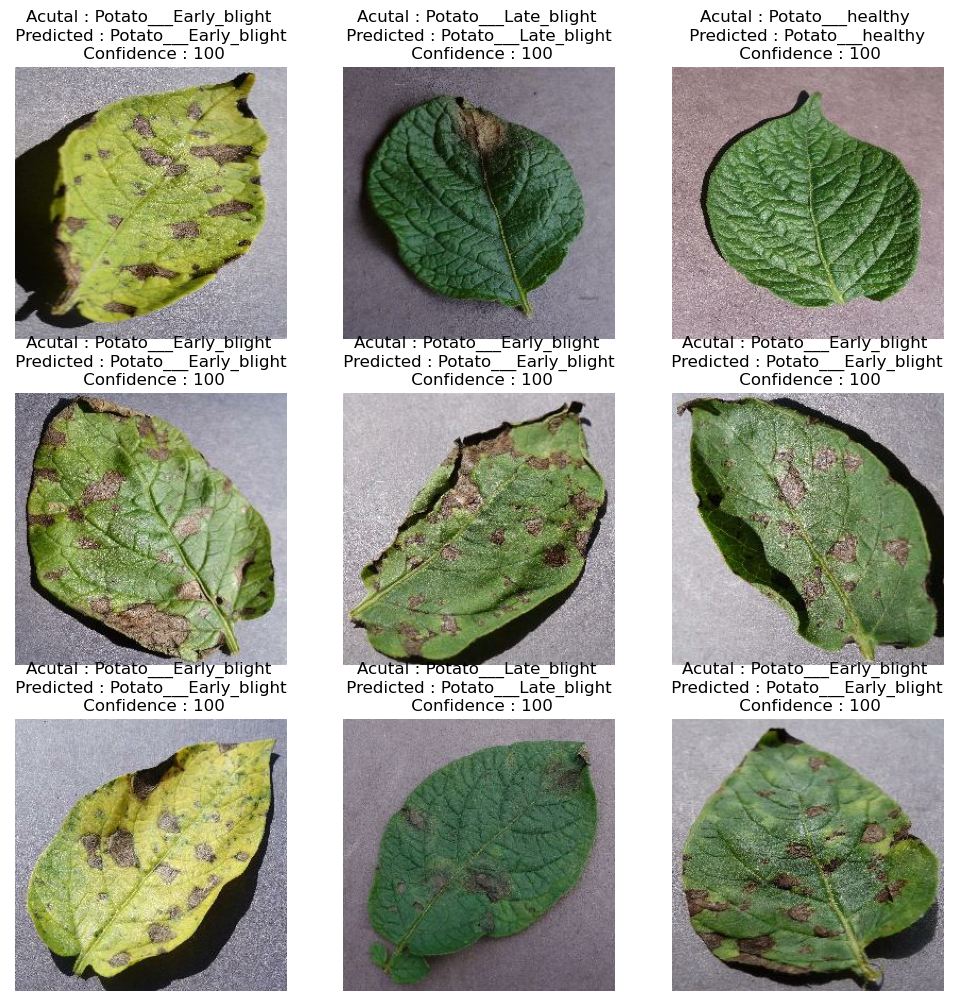

In [71]:
plt.figure(figsize=(12,12))
for image, label in test.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        
        pred_class, confidence = predict(model, image[i].numpy())
        
        classe = class_name[label[i]]
        
        plt.title(f"Acutal : {classe} \n Predicted : {pred_class} \n Confidence : {confidence}")
        
        plt.axis("off")

In [83]:
model.save(f"C:/Users/Jacki/anaconda mini/Potato images/model/{model_version}")
model_version = max([int(i) for i in os.listdir('C:/Users/Jacki/anaconda mini/Potato images/model') + [0]]) + 1
model_version

2

In [84]:
[os.listdir("C:/Users/Jacki/anaconda mini/Potato images/model")]

[['1']]

## Split Folders

In [98]:
import splitfolders

input_folder = 'C:/Users/Jacki/anaconda mini/Potato images/Potato'
output_folder = 'C:/Users/Jacki/anaconda mini/Potato images/Potato/train-test'

# Split the input folder into train, validation, and test sets with a ratio of 70:15:15
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(0.7, 0.2, 0.1), group_prefix=None)

Copying files: 2152 files [00:04, 485.87 files/s]


In [114]:
train_generator = ImageDataGenerator(
    rescale = 1.0/255.0,
    horizontal_flip = True,
    rotation_range = 10
)

train_gen = train_generator.flow_from_directory(
    'C:/Users/Jacki/anaconda mini/Potato images/Potato/train-test/train',
    target_size = (img_size, img_size),
    class_mode = 'sparse',
    batch_size = batch_size
)

Found 1506 images belonging to 4 classes.


In [115]:
val_generator = ImageDataGenerator(
    rescale = 1.0/255.0,
    horizontal_flip = True,
    rotation_range = 10
)

val_gen = val_generator.flow_from_directory(
    'C:/Users/Jacki/anaconda mini/Potato images/Potato/train-test/val',
    target_size = (img_size, img_size),
    class_mode = 'sparse',
    batch_size = batch_size
)

Found 216 images belonging to 4 classes.


In [116]:
test_generator = ImageDataGenerator(
    rescale = 1.0/255.0,
    horizontal_flip = True,
    rotation_range = 10
)

test_gen = test_generator.flow_from_directory(
    'C:/Users/Jacki/anaconda mini/Potato images/Potato/train-test/test',
    target_size = (img_size, img_size),
    class_mode = 'sparse',
    batch_size = batch_size
)

Found 430 images belonging to 4 classes.


## Create Model

In [107]:
input_shape = (img_size, img_size, channels)
model = models.Sequential([
                        layers.InputLayer(input_shape = input_shape),
                        layers.Conv2D(32, kernel_size =(3,3), activation = "relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, kernel_size =(3,3), activation = "relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, kernel_size =(3,3), activation = "relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, (3,3), activation = "relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, (3,3), activation = "relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, (3,3), activation = "relu"),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(64, activation = 'relu'),
                        layers.Dense(3, activation = "softmax")

                          
])

model.build(input_shape = input_shape)

In [110]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 30, 30, 64)      

In [112]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
             metrics = ['accuracy']
             )

In [113]:
1506 / 32

47.0625

In [129]:
history = model.fit(
    train_gen,
         steps_per_epoch = 47,
         batch_size = batch_size,
         validation_data = val_gen,
         validation_steps = 6,
         verbose = 1,
         epochs = 20,
         )

Epoch 1/20
47/47 [==============================] - 58s 1s/step - loss: 0.0556 - accuracy: 0.9776 - val_loss: 0.1967 - val_accuracy: 0.9375
Epoch 2/20
47/47 [==============================] - 82s 2s/step - loss: 0.0425 - accuracy: 0.9824 - val_loss: 0.0910 - val_accuracy: 0.9688
Epoch 3/20
47/47 [==============================] - 83s 2s/step - loss: 0.0545 - accuracy: 0.9783 - val_loss: 0.4690 - val_accuracy: 0.8646
Epoch 4/20
47/47 [==============================] - 83s 2s/step - loss: 0.0634 - accuracy: 0.9796 - val_loss: 0.0706 - val_accuracy: 0.9792
Epoch 5/20
47/47 [==============================] - 82s 2s/step - loss: 0.1259 - accuracy: 0.9552 - val_loss: 0.1058 - val_accuracy: 0.9583
Epoch 6/20
47/47 [==============================] - 82s 2s/step - loss: 0.0491 - accuracy: 0.9810 - val_loss: 0.0993 - val_accuracy: 0.9635
Epoch 7/20
47/47 [==============================] - 82s 2s/step - loss: 0.0363 - accuracy: 0.9844 - val_loss: 0.1726 - val_accuracy: 0.9531
Epoch 8/20
47/47 [==

## Scoring and Graphing

In [130]:
scores = model.evaluate(test_gen)

14/14 [==============================] - 14s 973ms/step - loss: 0.0680 - accuracy: 0.9814


In [131]:
scores

[0.06798680871725082, 0.9813953638076782]

In [132]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [133]:
potato = history.history
potato.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [134]:
len(potato['loss'])

20

In [135]:
acc = potato['accuracy']
val_acc = potato['val_accuracy']

loss = potato['loss']
val_loss = potato['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

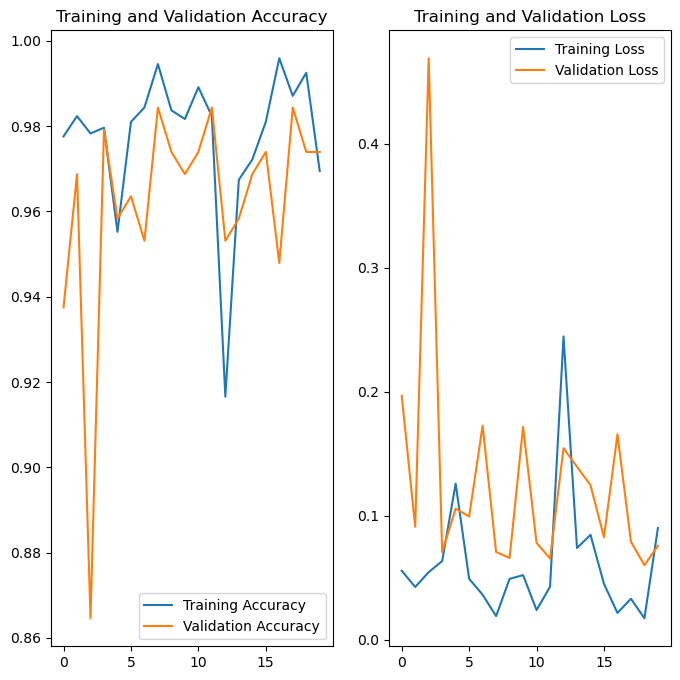

In [137]:
epochs = 20
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = 'Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label = 'Training Loss')
plt.plot(range(epochs), val_loss, label = 'Validation Loss')
plt.legend()
plt.title("Training and Validation Loss")


## Displaying Images

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 714ms/step
predicted label: Potato___Early_blight


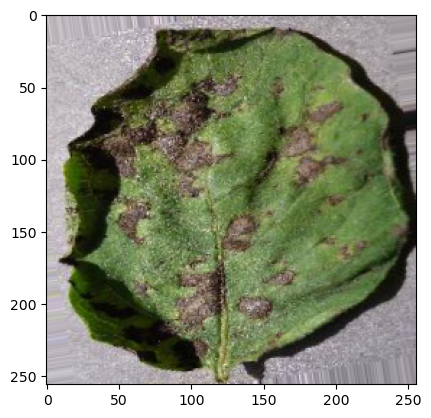

In [142]:
for image, label in test_gen:
    image_2 = image[0]
    label_2 = int(label[0])
    
    print("first image to predict")
    plt.imshow(image_2)
    print("actual label:",class_name[label_2])
    
    pred = model.predict(image)
    print("predicted label:",class_name[np.argmax(pred[0])])
    
    break

In [156]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i])
    img_array = tf.expand_dims(img_array, 0)

    pred = model.predict(img_array)

    pred_class = class_name[np.argmax(pred[0])]
    confidence = round(100 * (np.max(pred[0])), 2)
    return pred_class, confidence

1/1 [==============================] - 0s 24ms/step


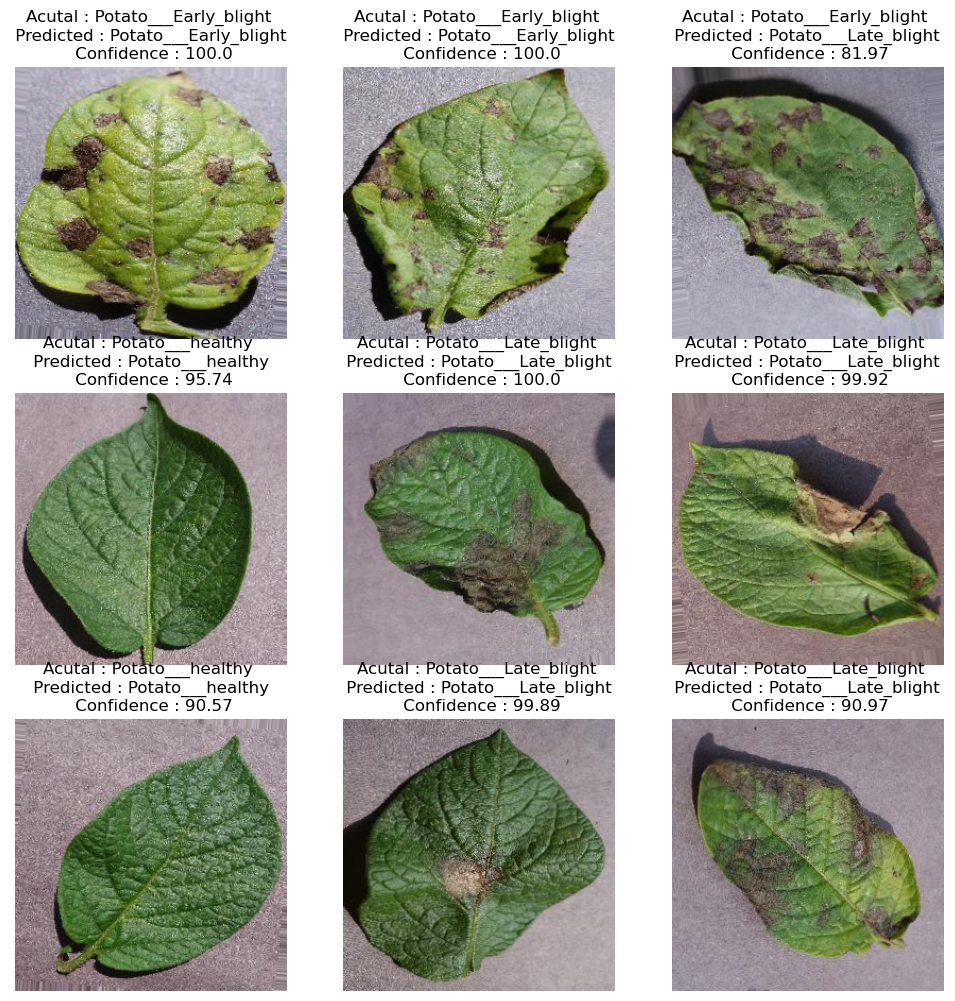

In [159]:
plt.figure(figsize=(12,12))
for image, label in test_gen:
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(image[i])
        
        pred_class, confidence = predict(model, image[i])
        
        classe = class_name[int(label[i])]
        
        plt.title(f"Acutal : {classe} \n Predicted : {pred_class} \n Confidence : {confidence}")
        
        plt.axis("off")
    break